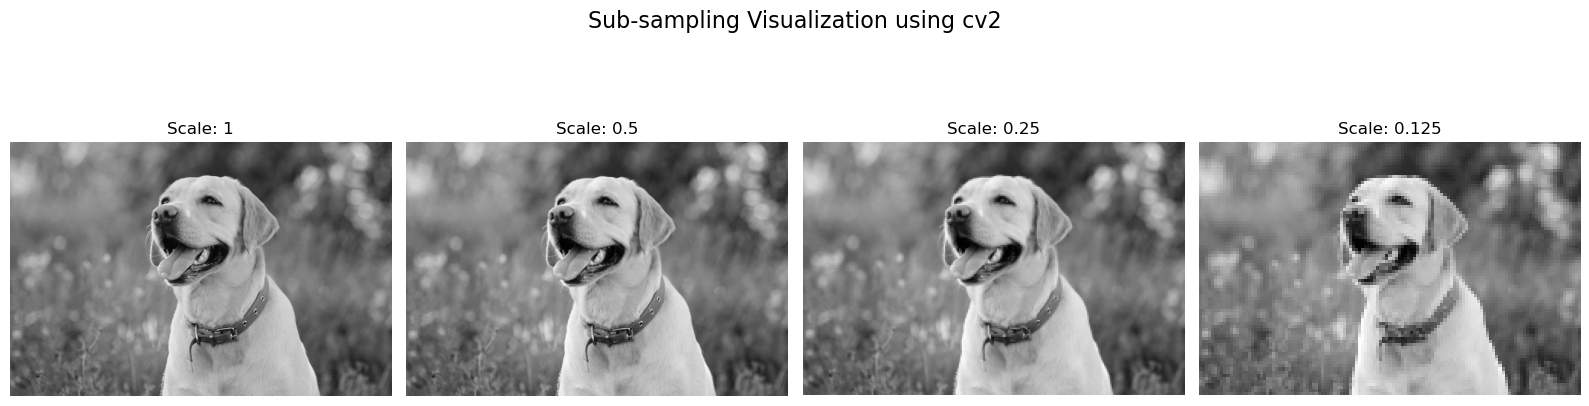

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image using OpenCV
image = cv2.imread('dog.jpeg', cv2.IMREAD_GRAYSCALE)  # Use IMREAD_COLOR if you want color

# Define scales
scales = [1, 0.5, 0.25, 0.125]

# Set up the figure
fig, axes = plt.subplots(1, len(scales), figsize=(16, 5))
fig.suptitle("Sub-sampling Visualization using cv2", fontsize=16)

# Loop through each scale and display
for i, scale in enumerate(scales):
    if scale == 1:
        downsampled = image
    else:
        width = int(image.shape[1] * scale)
        height = int(image.shape[0] * scale)
        downsampled = cv2.resize(image, (width, height), interpolation=cv2.INTER_AREA)

    axes[i].imshow(downsampled, cmap='gray')
    axes[i].set_title(f"Scale: {scale}")
    axes[i].axis('off')

plt.tight_layout()
plt.show()


Aliasing 

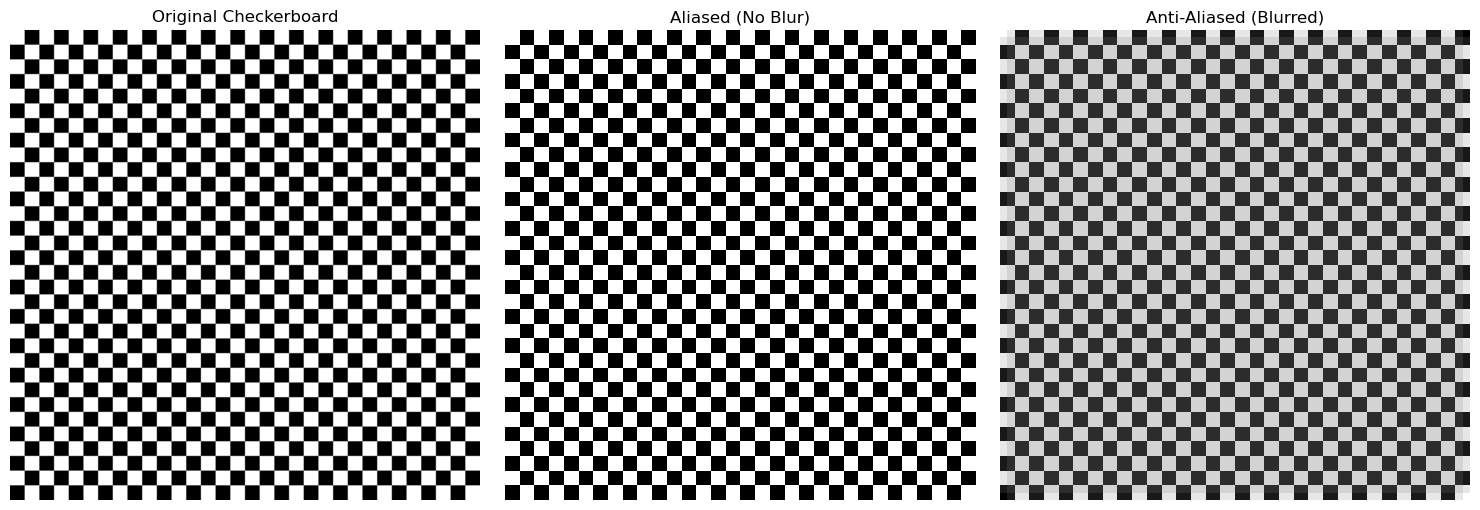

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Generate a high-frequency checkerboard pattern
def create_checkerboard(size=256, num_checks=32):
    row_check = np.kron([[1, 0] * (num_checks//2), [0, 1] * (num_checks//2)] * (num_checks//2), 
                        np.ones((size // num_checks, size // num_checks)))
    return (row_check * 255).astype(np.uint8)

# Create the checkerboard image
checkerboard = create_checkerboard(size=256, num_checks=32)

# Downsample without anti-aliasing (simulate aliasing)
aliasing = checkerboard[::4, ::4]

# Downsample with anti-aliasing (blur before resize)
blurred = cv2.GaussianBlur(checkerboard, (5, 5), 0)
no_aliasing = cv2.resize(blurred, (checkerboard.shape[1]//4, checkerboard.shape[0]//4), interpolation=cv2.INTER_AREA)

# Plot
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(checkerboard, cmap='gray')
axs[0].set_title("Original Checkerboard")
axs[1].imshow(aliasing, cmap='gray')
axs[1].set_title("Aliased (No Blur)")
axs[2].imshow(no_aliasing, cmap='gray')
axs[2].set_title("Anti-Aliased (Blurred)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()


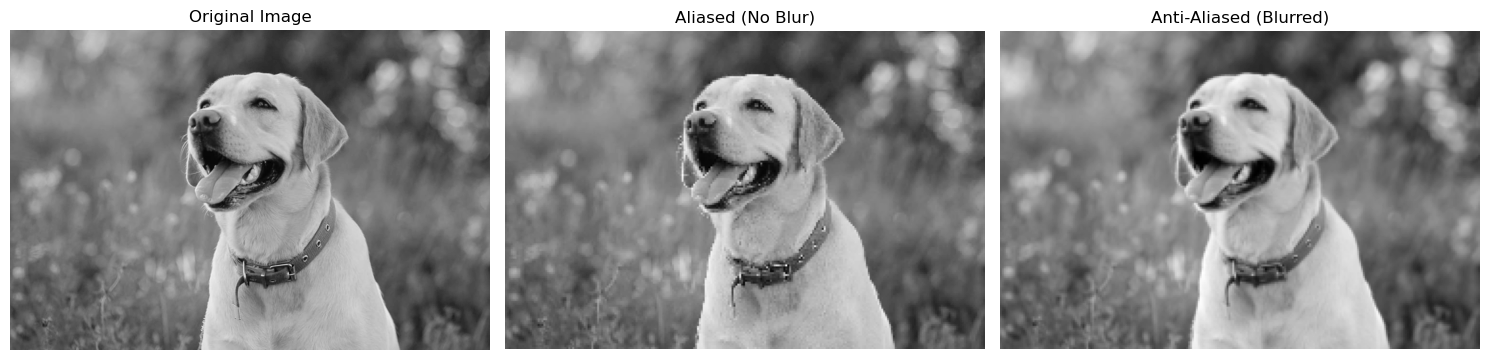

In [3]:
# Resize factor (downsample by 4×)
scale = 0.25
new_size = (int(image.shape[1] * scale), int(image.shape[0] * scale))

# 1. Naive Downsampling (aliasing)
aliasing = cv2.resize(image, new_size, interpolation=cv2.INTER_NEAREST)

# 2. Anti-aliased Downsampling (Gaussian blur before resize)
blurred = cv2.GaussianBlur(image, (5, 5), 0)
no_aliasing = cv2.resize(blurred, new_size, interpolation=cv2.INTER_AREA)

# Plotting
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original Image")
axs[1].imshow(aliasing, cmap='gray')
axs[1].set_title("Aliased (No Blur)")
axs[2].imshow(no_aliasing, cmap='gray')
axs[2].set_title("Anti-Aliased (Blurred)")
for ax in axs:
    ax.axis('off')
plt.tight_layout()
plt.show()

Interpolation

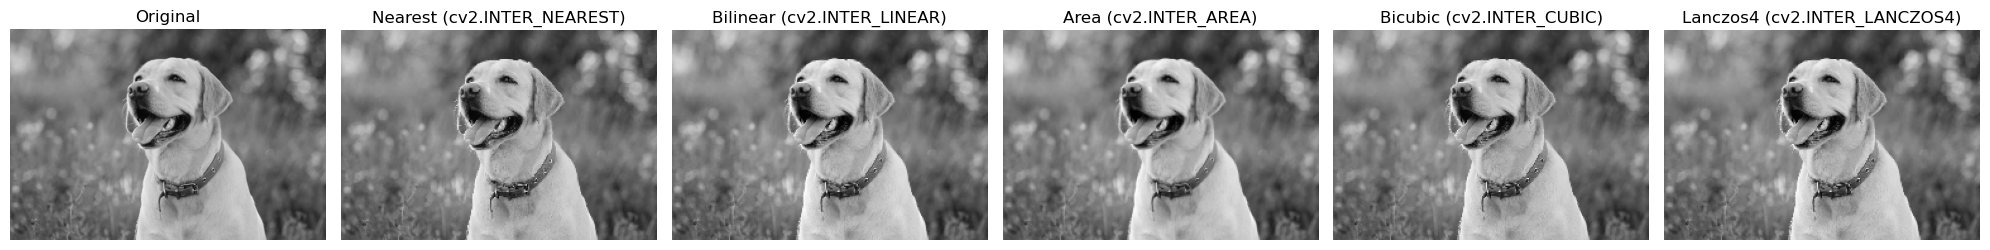

In [4]:
import cv2
import matplotlib.pyplot as plt

# Downscale size (e.g., 0.25x)
scale = 0.25
new_size = (int(image.shape[1] * scale), int(image.shape[0] * scale))

# Resize using different interpolation methods
methods = {
    "Nearest (cv2.INTER_NEAREST)": cv2.INTER_NEAREST,
    "Bilinear (cv2.INTER_LINEAR)": cv2.INTER_LINEAR,
    "Area (cv2.INTER_AREA)": cv2.INTER_AREA,
    "Bicubic (cv2.INTER_CUBIC)": cv2.INTER_CUBIC,
    "Lanczos4 (cv2.INTER_LANCZOS4)": cv2.INTER_LANCZOS4
}

# Plot results
fig, axs = plt.subplots(1, len(methods)+1, figsize=(20, 5))
axs[0].imshow(image, cmap='gray')
axs[0].set_title("Original")
axs[0].axis('off')

for i, (name, method) in enumerate(methods.items(), start=1):
    resized = cv2.resize(image, new_size, interpolation=method)
    axs[i].imshow(resized, cmap='gray')
    axs[i].set_title(name)
    axs[i].axis('off')

plt.tight_layout()
plt.show()


# Edge Detection

We map the 2D signal / matrix to lines , set of curves

How are Images formed --> Any type of discontinuity - like in surface normal or color or depth or illumination 